<a href="https://colab.research.google.com/github/gitflai/DDS4/blob/main/Aula_9_DDS4_Modelos_de_Classifica%C3%A7%C3%A3o%2C_Regressao_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

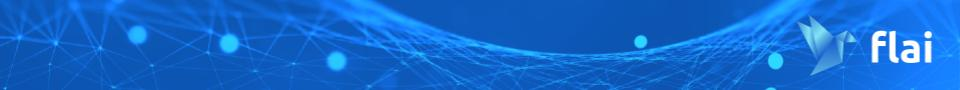

# **Aula 9 - DDS4 - Modelos de Classificação, Regressão Logística**

## **Importação e Preparação dos Dados**

In [66]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


## **Upgrade na Técnica de Validação: _K-FOLD_**

In [68]:
# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


In [108]:
validacao = KFold(n_splits = 10, shuffle = True)

---
## **Regressão Logística**

In [99]:
from sklearn.linear_model import LogisticRegression 

X = dados[['bmi', 'charges']]
y = dados['smoker'] 

modelo = LogisticRegression() 

In [104]:
reglog = cross_validate(modelo, X, y, cv = validacao, 
                        scoring = ['accuracy', 'recall', 'precision']) 

In [105]:
reglog

{'fit_time': array([0.02175808, 0.01415038, 0.01317883, 0.01237702, 0.012182  ,
        0.01216769, 0.01174712, 0.01118994, 0.01164865, 0.01130581]),
 'score_time': array([0.00360465, 0.00353956, 0.00354433, 0.00355244, 0.00334573,
        0.00331187, 0.00315905, 0.00301123, 0.00318313, 0.00317287]),
 'test_accuracy': array([0.94776119, 0.92537313, 0.94029851, 0.94029851, 0.91791045,
        0.95522388, 0.93283582, 0.92537313, 0.91729323, 0.93233083]),
 'test_precision': array([0.86666667, 1.        , 0.88888889, 0.8       , 0.83333333,
        0.82352941, 0.83333333, 0.9047619 , 0.90322581, 0.81481481]),
 'test_recall': array([0.89655172, 0.67741935, 0.82758621, 0.86956522, 0.74074074,
        0.82352941, 0.86206897, 0.7037037 , 0.77777778, 0.84615385])}

In [106]:
round(reglog['test_precision'].mean(), 4)

0.8669

In [107]:
print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9335
Sensibilidade: 0.8025
     Precisão: 0.8669


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


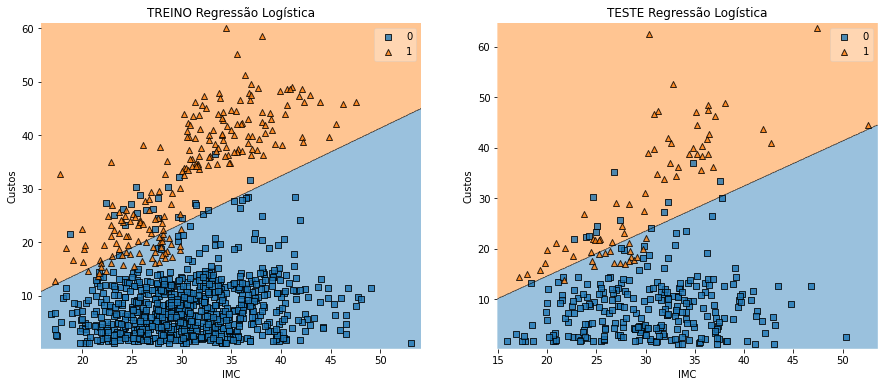

In [110]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **KNN**

In [121]:
from sklearn.neighbors import KNeighborsClassifier 

X = dados[['bmi', 'charges']]
y = dados['smoker'] 

k = 27
modelo = KNeighborsClassifier(n_neighbors = k) 
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9604
Sensibilidade: 0.9683
     Precisão: 0.8609


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


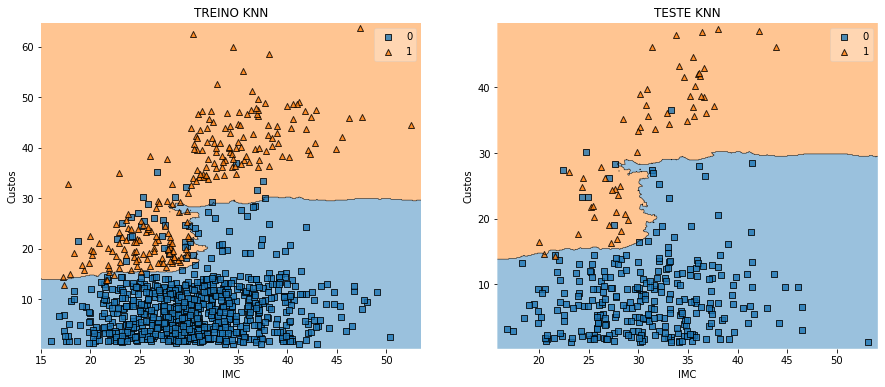

In [122]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()

---
## **Árvores de Decisão**

In [151]:
from sklearn.tree import DecisionTreeClassifier

X = dados[['bmi', 'charges']]
y = dados['smoker'] 

profundidade = 3
modelo = DecisionTreeClassifier(max_depth = profundidade)
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9604
Sensibilidade: 0.9478
     Precisão: 0.8648


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


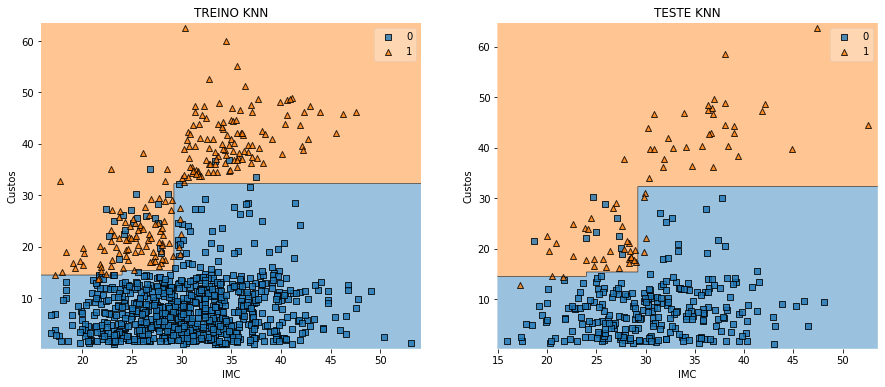

In [152]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()

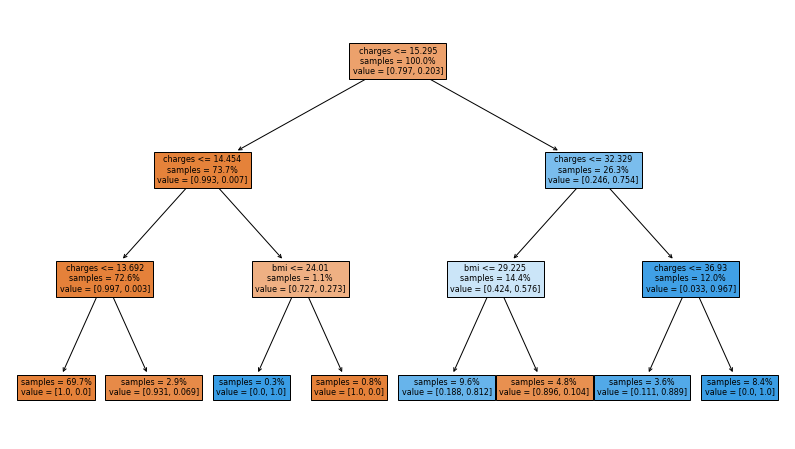

In [153]:
# Plot da Árvore

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

---
## **Comparação de Modelos via Validação Cruzada K-FOLD**

In [155]:
X = dados[['bmi', 'charges']]
y = dados['smoker']

modelos = [LogisticRegression(), 
           KNeighborsClassifier(n_neighbors = 5), 
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

nomes = ['Regressão Logística',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Precisão', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
KNN - K = 5,0.9589,0.9368,0.8720
Árvore - Prof = 3,0.9626,0.9638,0.8696
Árvore - Prof = 4,0.9604,0.9576,0.8650
Regressão Logística,0.9327,0.8060,0.8596
Árvore - Prof = 5,0.9529,0.9173,0.8587
KNN - K = 25,0.9596,0.9618,0.8569
KNN - K = 35,0.9589,0.9596,0.8560
KNN - K = 45,0.9589,0.9613,0.8546
KNN - K = 15,0.9589,0.9632,0.8538
Árvore - Prof = 1,0.9238,0.9603,0.7468


---

## **Exercícios Propostos**

- Encontre valores ótimos para o K do KNN e a profundidade da Árvores.

- Investigue a variabilidade dos resultados via Validação Cruzada K-FOLD.

---

**_#itstimetoflai_** 